In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('students_final.csv')

In [3]:
features = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 
            'ExtracurricularActivities', 'FinalGrade']

In [4]:
X = df[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 3

In [5]:
wcss = []
silhouette_scores = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    if k > 1:
        from sklearn.metrics import silhouette_score
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)

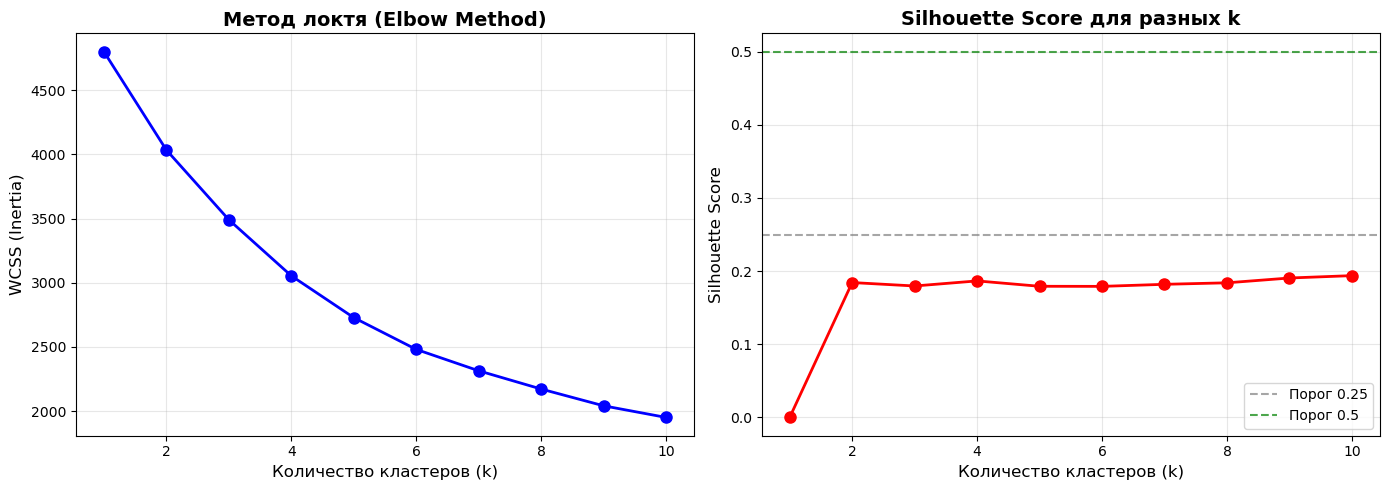

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График WCSS
axes[0].plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Количество кластеров (k)', fontsize=12)
axes[0].set_ylabel('WCSS (Inertia)', fontsize=12)
axes[0].set_title('Метод локтя (Elbow Method)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# График Silhouette Score
axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].axhline(y=0.25, color='gray', linestyle='--', alpha=0.7, label='Порог 0.25')
axes[1].axhline(y=0.5, color='green', linestyle='--', alpha=0.7, label='Порог 0.5')
axes[1].set_xlabel('Количество кластеров (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score для разных k', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

##  SPECTRAL CLUSTERING


SPECTRAL CLUSTERING
Silhouette: 0.134


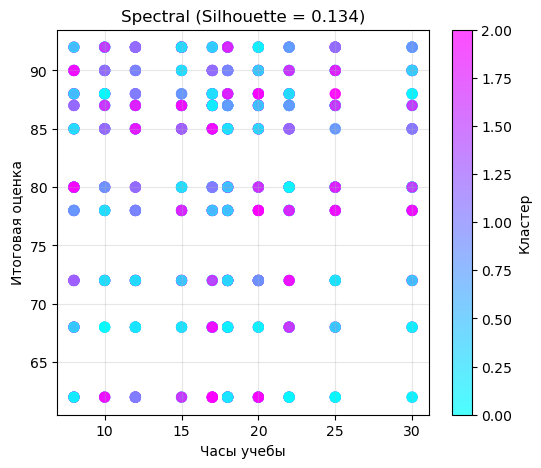

          AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
spectral                                                     
0                   87.7               18.0           81.6   
1                   87.8               17.5           83.0   
2                   81.3               17.3           68.3   

          ExtracurricularActivities  FinalGrade  
spectral                                         
0                               2.5        79.7  
1                               0.7        80.6  
2                               1.3        80.1  


In [7]:
from sklearn.cluster import SpectralClustering

print("\n" + "="*50)
print("SPECTRAL CLUSTERING")
print("="*50)

# Модель
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', 
                               random_state=42, assign_labels='kmeans')
df['spectral'] = spectral.fit_predict(X_scaled)

# Метрика
score = silhouette_score(X_scaled, df['spectral'])
print(f"Silhouette: {score:.3f}")

# Визуализация
plt.figure(figsize=(6, 5))
plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['spectral'], cmap='cool', alpha=0.7, s=50)
plt.xlabel('Часы учебы')
plt.ylabel('Итоговая оценка')
plt.title(f'Spectral (Silhouette = {score:.3f})')
plt.colorbar(label='Кластер')
plt.grid(alpha=0.3)
plt.show()

# Статистика
print(df.groupby('spectral')[features].mean().round(1))

## GAUSSIAN MIXTURE MODELS


GAUSSIAN MIXTURE MODELS
Silhouette: 0.146
BIC: 13525 (чем меньше, тем лучше)
AIC: 13224 (чем меньше, тем лучше)


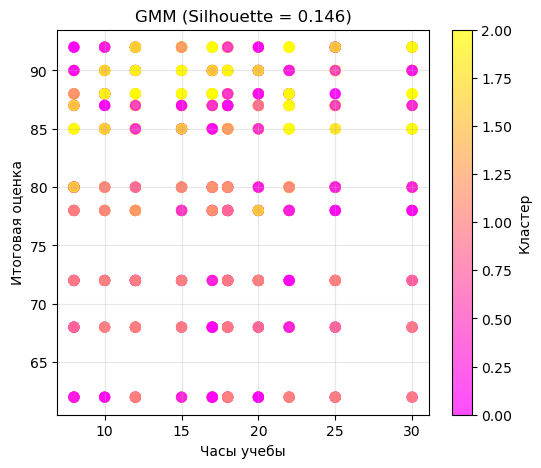

     AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
gmm                                                     
0              85.3               17.6           64.7   
1              87.3               17.7           83.5   
2              84.1               17.5           83.7   

     ExtracurricularActivities  FinalGrade  
gmm                                         
0                          1.4        80.3  
1                          1.9        73.8  
2                          1.2        87.3  


In [8]:
from sklearn.mixture import GaussianMixture

print("\n" + "="*50)
print("GAUSSIAN MIXTURE MODELS")
print("="*50)

# Модель
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df['gmm'] = gmm.fit_predict(X_scaled)

# Метрика
score = silhouette_score(X_scaled, df['gmm'])
print(f"Silhouette: {score:.3f}")
print(f"BIC: {gmm.bic(X_scaled):.0f} (чем меньше, тем лучше)")
print(f"AIC: {gmm.aic(X_scaled):.0f} (чем меньше, тем лучше)")

# Визуализация
plt.figure(figsize=(6, 5))
plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['gmm'], cmap='spring', alpha=0.7, s=50)
plt.xlabel('Часы учебы')
plt.ylabel('Итоговая оценка')
plt.title(f'GMM (Silhouette = {score:.3f})')
plt.colorbar(label='Кластер')
plt.grid(alpha=0.3)
plt.show()

# Статистика
print(df.groupby('gmm')[features].mean().round(1))

## Метод ближайших соседей

K-Means: Silhouette = 0.158


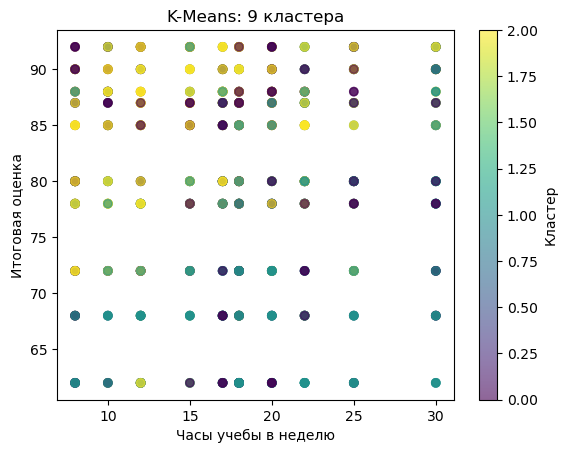


Средние значения по кластерам:
                AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
cluster_kmeans                                                     
0                         84.9               17.4           64.3   
1                         87.2               19.1           82.7   
2                         84.5               16.1           83.6   

                ExtracurricularActivities  FinalGrade  
cluster_kmeans                                         
0                                     1.3        81.0  
1                                     2.2        75.7  
2                                     0.8        84.3  


In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, df['cluster_kmeans'])
print(f"K-Means: Silhouette = {score:.3f}")

plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['cluster_kmeans'], cmap='viridis', alpha=0.6)
plt.xlabel('Часы учебы в неделю')
plt.ylabel('Итоговая оценка')
plt.title('K-Means: 9 кластера')
plt.colorbar(label='Кластер')
plt.show()

print("\nСредние значения по кластерам:")
print(df.groupby('cluster_kmeans')[features].mean().round(1))

## Иерархическая модель

Hierarchical: Silhouette = 0.134


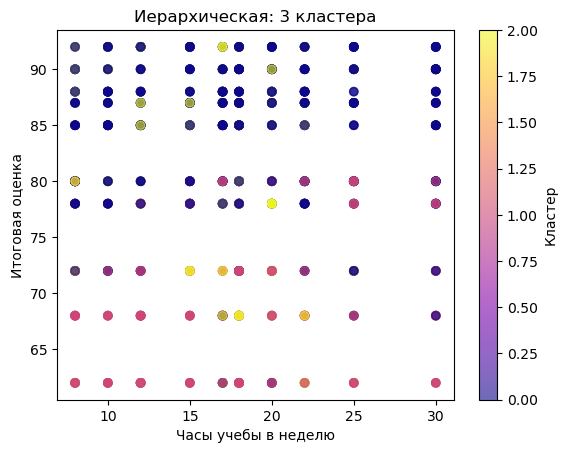


Средние значения по кластерам:
              AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
cluster_hier                                                     
0                       87.3               17.8           78.0   
1                       88.0               17.4           76.7   
2                       71.7               16.8           78.9   

              ExtracurricularActivities  FinalGrade  
cluster_hier                                         
0                                   1.5        85.3  
1                                   1.4        70.0  
2                                   1.7        78.7  


In [10]:
hierarchical = AgglomerativeClustering(n_clusters=3)
df['cluster_hier'] = hierarchical.fit_predict(X_scaled)

score = silhouette_score(X_scaled, df['cluster_hier'])
print(f"Hierarchical: Silhouette = {score:.3f}")

plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['cluster_hier'], cmap='plasma', alpha=0.6)
plt.xlabel('Часы учебы в неделю')
plt.ylabel('Итоговая оценка')
plt.title('Иерархическая: 3 кластера')
plt.colorbar(label='Кластер')
plt.show()

print("\nСредние значения по кластерам:")
print(df.groupby('cluster_hier')[features].mean().round(1))

## DBSCAN

DBSCAN: 37 кластеров, шум: 520 студентов
DBSCAN Silhouette: 0.131


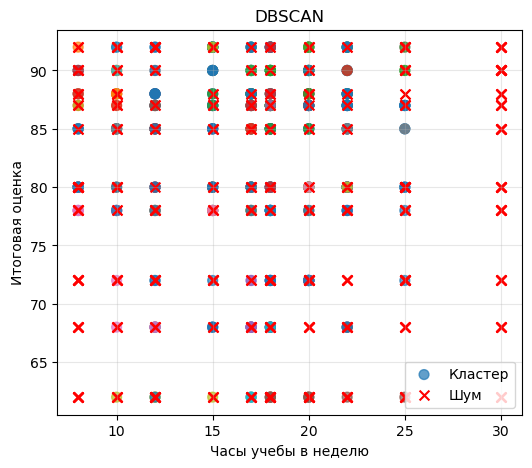

        AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
dbscan                                                     
0                 88.2               16.9           84.1   
1                 91.5               22.7           83.7   
2                 87.7               16.9           83.4   
3                 91.3               17.5           81.2   
4                 82.1               15.0           87.0   
5                 93.8               17.9           63.8   
6                 86.8                9.6           84.7   
7                 78.0               16.7           77.3   
8                 85.9               19.4           85.9   
9                 89.8               20.8           62.7   
10                91.0               18.1           83.8   
11                91.8               20.0           61.2   
12                85.4               17.7           63.8   
13                87.5               10.2           64.0   
14                88.2               17.

In [11]:
dbscan = DBSCAN(eps=0.7, min_samples= 5)
df['dbscan'] = dbscan.fit_predict(X_scaled)

n_clusters = len(set(df['dbscan'])) - (1 if -1 in df['dbscan'] else 0)
n_noise = (df['dbscan'] == -1).sum()
print(f"DBSCAN: {n_clusters} кластеров, шум: {n_noise} студентов")

if n_clusters >= 2:
    mask = df['dbscan'] != -1
    score = silhouette_score(X_scaled[mask], df['dbscan'][mask])
    print(f"DBSCAN Silhouette: {score:.3f}")

plt.figure(figsize=(6, 5))
plt.scatter(df.loc[df['dbscan'] != -1, 'StudyHoursPerWeek'], 
            df.loc[df['dbscan'] != -1, 'FinalGrade'], 
            c=df.loc[df['dbscan'] != -1, 'dbscan'], 
            cmap='tab10', alpha=0.7, s=50, label='Кластер')

if n_noise > 0:
    plt.scatter(df.loc[df['dbscan'] == -1, 'StudyHoursPerWeek'], 
                df.loc[df['dbscan'] == -1, 'FinalGrade'], 
                c='red', marker='x', s=50, label='Шум')
plt.xlabel('Часы учебы в неделю')
plt.ylabel('Итоговая оценка')
plt.title('DBSCAN')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

if n_clusters > 1:
    print(df[df['dbscan'] != -1].groupby('dbscan')[features].mean().round(1))

In [12]:
print("Сравнение Silhouette Score:")
print(f"K-Means:       {silhouette_score(X_scaled, df['cluster_kmeans']):.3f}")
print(f"Hierarchical:  {silhouette_score(X_scaled, df['cluster_hier']):.3f}")
if n_clusters >= 2:
    mask = df['dbscan'] != -1
    print(f"DBSCAN:        {silhouette_score(X_scaled[mask], df['dbscan'][mask]):.3f}")
else:
    print("DBSCAN:        недостаточно кластеров для оценки")

Сравнение Silhouette Score:
K-Means:       0.158
Hierarchical:  0.134
DBSCAN:        0.131


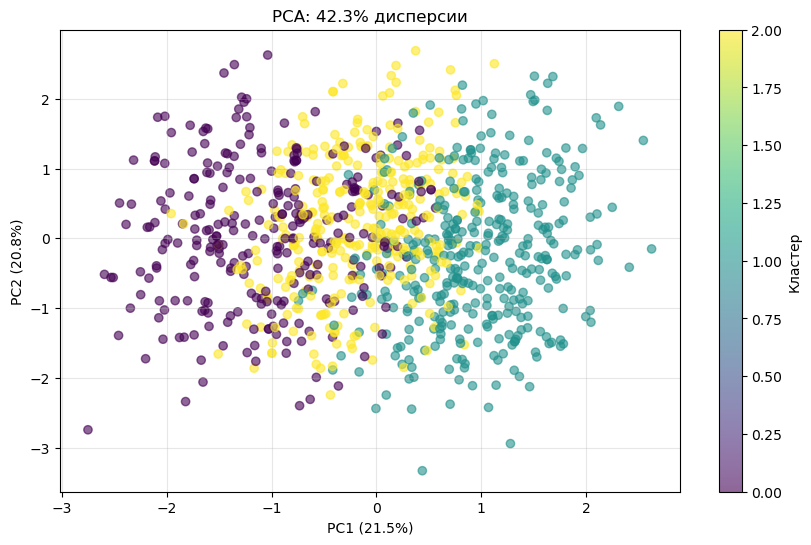

PC1 объясняет: 21.5%
PC2 объясняет: 20.8%
Всего: 42.3%


In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Кластеризация
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Визуализация
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title(f'PCA: {sum(pca.explained_variance_ratio_)*100:.1f}% дисперсии')
plt.colorbar(scatter, label='Кластер')
plt.grid(alpha=0.3)
plt.show()

# Результаты
print(f"PC1 объясняет: {pca.explained_variance_ratio_[0]*100:.1f}%")
print(f"PC2 объясняет: {pca.explained_variance_ratio_[1]*100:.1f}%")
print(f"Всего: {sum(pca.explained_variance_ratio_)*100:.1f}%")

R² Score: -0.0151
RMSE: 9.80

Коэффициенты:
Intercept: 80.32
AttendanceRate: 0.2473
StudyHoursPerWeek: 0.2294
PreviousGrade: 0.1351


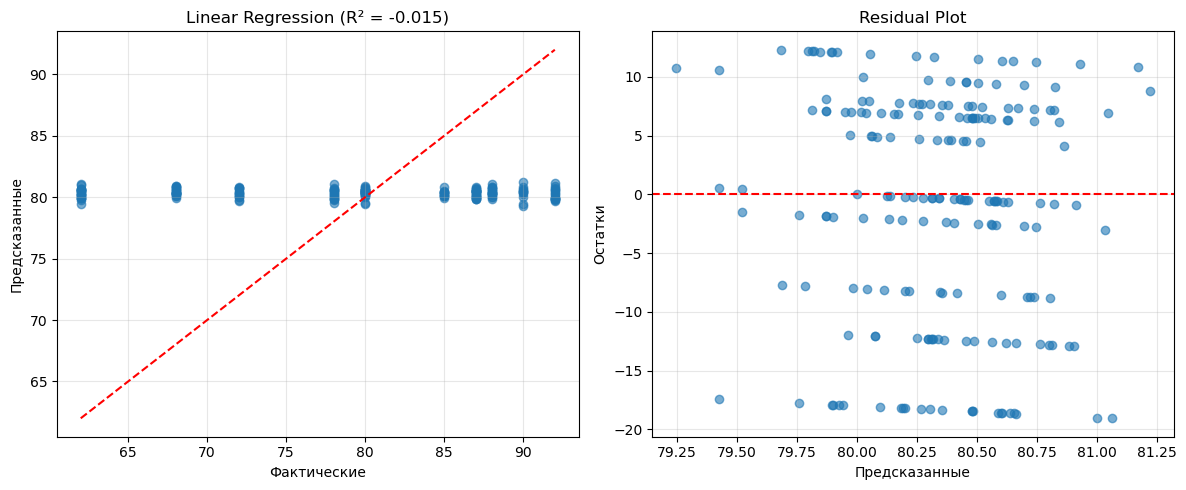

In [22]:
featur = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade']
X = df[featur].dropna()
y = df.loc[X.index, 'FinalGrade']

# Разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === МАСШТАБИРОВАНИЕ ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение на масштабированных данных
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = model.predict(X_test_scaled)

# Метрики
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"\nКоэффициенты:")
print(f"Intercept: {model.intercept_:.2f}")
for feature, coef in zip(featur, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Графики
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(y_test, y_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_xlabel('Фактические')
axes[0].set_ylabel('Предсказанные')
axes[0].set_title(f'Linear Regression (R² = {r2:.3f})')
axes[0].grid(alpha=0.3)

residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Предсказанные')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Residual Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Без масштабирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R²: {r2_rf:.4f}")
print("\nВажность признаков:")
for feat, imp in zip(features, rf_model.feature_importances_):
    print(f"  {feat}: {imp:.4f}")

Random Forest R²: -0.1841

Важность признаков:
  AttendanceRate: 0.3119
  StudyHoursPerWeek: 0.3447
  PreviousGrade: 0.3435
